In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [36]:
df = pd.read_csv('GazaGovtest_weights.csv')  
X = df['X']
Y = df['Y']
W = 1/df['ThreatWeigh']

#Threats = df['X']

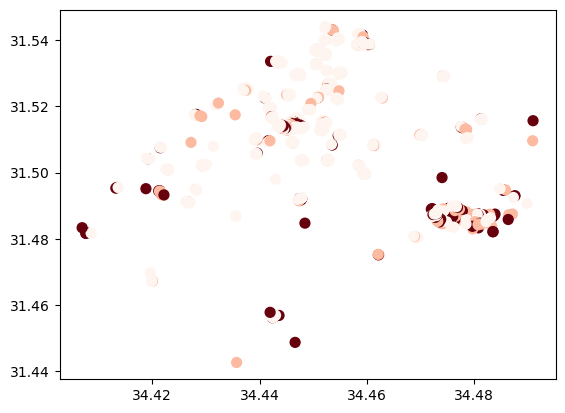

In [37]:
plt.scatter(X, Y, s=50, c=W, cmap='Reds')


In [39]:
#dfmat = pd.DataFrame(df)
df['W'] = 1 / df['ThreatWeigh']
#dfmat = df.assign(W = lambda x: 1/x.df['ThreatWeigh'])
df.to_csv('Wtest.csv', index=False)

In [81]:
grid_x, grid_y = np.meshgrid(np.linspace(34.4, 34.5, 350),
                             np.linspace(31.44, 31.55, 350), indexing='ij')
from scipy.interpolate import griddata
grid_z0 = griddata((df['X'], df['Y']), df['W'], (grid_x, grid_y), method='nearest')
grid_z1 = griddata((df['X'], df['Y']), df['W'], (grid_x, grid_y), method='linear')
grid_z2 = griddata((df['X'], df['Y']), df['W'], (grid_x, grid_y), method='cubic')

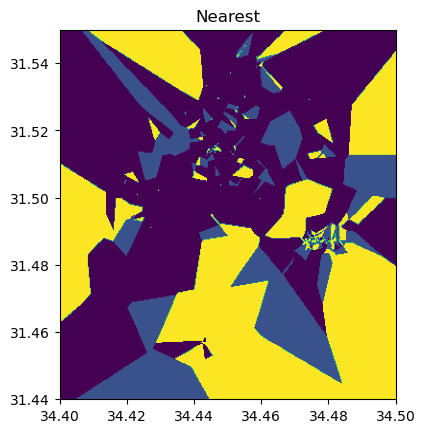

In [82]:

plt.imshow(grid_z0.T, extent=(34.4, 34.5, 31.44, 31.55), origin='lower')
plt.title('Nearest')
plt.show()

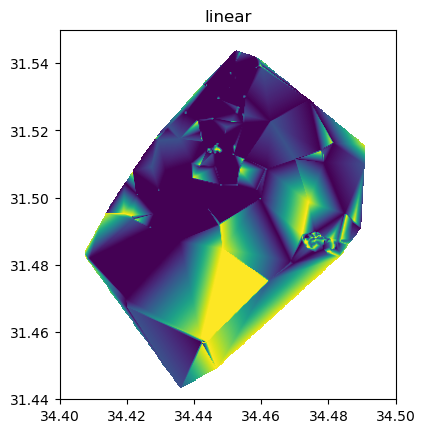

In [83]:

plt.imshow(grid_z1.T, extent=(34.4, 34.5, 31.44, 31.55), origin='lower')
plt.title('linear')
plt.show()

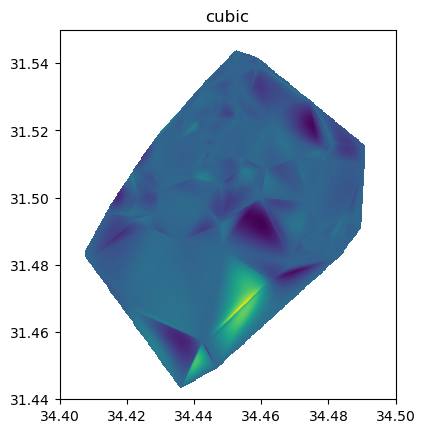

In [84]:
plt.imshow(grid_z2.T, extent=(34.4, 34.5, 31.44, 31.55), origin='lower')
plt.title('cubic')
plt.show()

In [68]:
dwf = pd.DataFrame(grid_z2.T)
dwf.to_csv('Wtestcubic.csv', index=False)